# Libraries

In [1]:
import sys
# path = r'C:\Users\wande\OneDrive\Documentos\GitHub\PAREPYDEV'
# path = r'C:\Users\rezio\OneDrive\Documentos\.git codes\PAREPY'
path = r'C:\Users\wander\Documents\GitHub\PAREPYDEV_NEW'
path = r'C:\Users\wande\OneDrive\Documentos\GitHub\PAREPY' # PC notebook wander
sys.path.append(path)
import pandas as pd
pd.set_option('display.max_columns', None)

# Run

In [2]:
from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import nowak_collins_example

# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 1000, 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': nowak_collins_example,
             'name simulation': None,
        }

# Call algorithm
results, pf, beta = sampling_algorithm_structural_analysis(setup)

20:49:55 - Checking inputs completed!
20:49:55 - Started State Limit Function evaluation (g)...
20:50:01 - Finished State Limit Function evaluation (g) in 5.35e+00 seconds!
20:50:01 - Started evaluation beta reliability index and failure probability...
20:50:01 - Finished evaluation beta reliability index and failure probability in 2.12e-02 seconds!
20:50:01 - Voilà!!!!....simulation results were not saved in a text file!


In [3]:
pf_list = pf.values.flatten().tolist()
beta_list = beta.values.flatten().tolist()
for i, (p, b) in enumerate(zip(pf_list, beta_list)):
    print(f"State Limite function (g): {i}, pf: {p:.6f}, beta: {b:.6f}")

State Limite function (g): 0, pf: 0.000000, beta: 21.589144


In [4]:
from parepy_toolbox import sampling_algorithm_structural_analysis_kernel
from obj_function import nowak_collins_example

# Dataset
f = {'type': 'normal', 'parameters': {'mean': 40.3, 'sigma': 4.64}, 'stochastic variable': False}
p = {'type': 'gumbel max', 'parameters': {'mean': 10.2, 'sigma': 1.12}, 'stochastic variable': False}
w = {'type': 'lognormal', 'parameters': {'mean': 0.25, 'sigma': 0.025}, 'stochastic variable': False}
var = [f, p, w]

# PAREpy setup
setup = {
             'number of samples': 1000, 
             'numerical model': {'model sampling': 'mcs'}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': None,
             'objective function': nowak_collins_example,
             'name simulation': 'sdsdsd',
        }

# Call algorithm
results = sampling_algorithm_structural_analysis_kernel(setup)

In [5]:
from tabulate import tabulate
table = tabulate(results, headers='keys', tablefmt='psql')
print(table)

+-----+---------+----------+----------+---------+---------+----------+-------+
|     |     X_0 |      X_1 |      X_2 |     R_0 |     S_0 |      G_0 |   I_0 |
|-----+---------+----------+----------+---------+---------+----------+-------|
|   0 | 37.531  | 11.4658  | 0.219597 | 3002.48 | 1899.84 | 1102.64  |     0 |
|   1 | 43.7959 | 11.4234  | 0.259996 | 3503.67 | 2133.16 | 1370.51  |     0 |
|   2 | 42.8198 | 10.8245  | 0.219285 | 3425.58 | 1863.4  | 1562.18  |     0 |
|   3 | 35.3193 | 11.1228  | 0.247637 | 2825.54 | 2044.85 |  780.691 |     0 |
|   4 | 41.8258 | 10.6629  | 0.25245  | 3346.06 | 2048.09 | 1297.97  |     0 |
|   5 | 37.952  | 10.581   | 0.234924 | 3036.16 | 1941.45 | 1094.71  |     0 |
|   6 | 37.111  | 10.2483  | 0.240496 | 2968.88 | 1955.98 | 1012.9   |     0 |
|   7 | 49.4115 |  9.04139 | 0.24693  | 3952.92 | 1928.33 | 2024.59  |     0 |
|   8 | 40.6538 | 10.5445  | 0.219414 | 3252.31 | 1849.02 | 1403.28  |     0 |
|   9 | 39.1816 |  8.44653 | 0.258937 | 3134.52 | 19

In [6]:
from parepy_toolbox import sampling_algorithm_structural_analysis
from obj_function import nowak_collins_time_example
import numpy as np

# Dataset
f = {'type': 'normal', 
    'parameters': {'mean': 40.3, 'sigma': 4.64}, 
    'stochastic variable': False, 
    }

p = {'type': 'gumbel max',
    'parameters': {'mean': 10.2, 'sigma': 1.12}, 
    'stochastic variable': False, 
    }

w = {'type': 'lognormal',
    'parameters': {'mean': 0.25, 'sigma': 0.025}, 
    'stochastic variable': False, 
    }

# PAREpy setup
setup = {
             'number of samples': 70000, 
             'numerical model': {'model sampling': 'mcs-time', 'time steps': 5}, 
             'variables settings': var, 
             'number of state limit functions or constraints': 1, 
             'none variable': {'time analysis': list(np.linspace(0, 50, num=5, endpoint=True))},
             'objective function': nowak_collins_time_example,
             'name simulation': None,
        }

# Call algorithm
results, pf, beta = sampling_algorithm_structural_analysis(setup)

20:50:01 - Checking inputs completed!
20:50:01 - Started State Limit Function evaluation (g)...
20:50:14 - Finished State Limit Function evaluation (g) in 1.27e+01 seconds!
20:50:14 - Started evaluation beta reliability index and failure probability...
20:50:14 - Finished evaluation beta reliability index and failure probability in 2.09e-02 seconds!
20:50:14 - Voilà!!!!....simulation results were not saved in a text file!


In [12]:
pf_list = pf['G_0'].tolist()
beta_list = beta['G_0'].tolist()
for i, (p, b) in enumerate(zip(pf_list, beta_list)):
    print(f"Time step (id={i}, time={setup['none variable']['time analysis'][i]}), pf: {p:.6f}, beta: {b:.6f}")

Time step (id=0, time=0.0), pf: 0.001671, beta: 2.934314
Time step (id=1, time=12.5), pf: 0.001671, beta: 2.934314
Time step (id=2, time=25.0), pf: 0.001671, beta: 2.934314
Time step (id=3, time=37.5), pf: 0.001671, beta: 2.934314
Time step (id=4, time=50.0), pf: 0.001671, beta: 2.934314


C:\Users\wande\AppData\Local\Temp\ipykernel_9340\2470366457.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


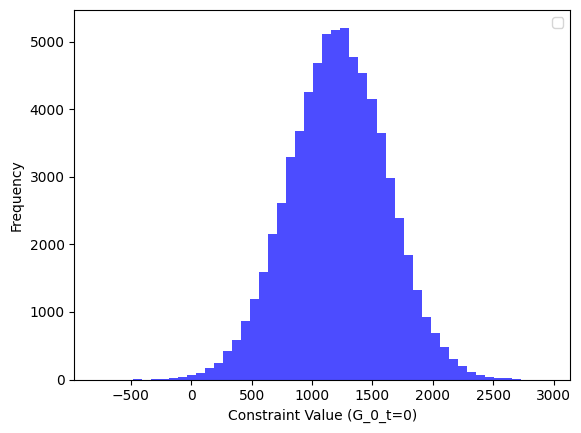

Most Probable Points Near Failure (G_0_t=0 >= 0):
         X_0_t=0    X_0_t=1    X_0_t=2    X_0_t=3    X_0_t=4    X_1_t=0  \
47921  25.934750  25.934750  25.934750  25.934750  25.934750   9.960497   
40808  25.361556  25.361556  25.361556  25.361556  25.361556  10.452647   
5261   26.226823  26.226823  26.226823  26.226823  26.226823   9.092542   

         X_1_t=1    X_1_t=2    X_1_t=3    X_1_t=4   X_2_t=0   X_2_t=1  \
47921   9.960497   9.960497   9.960497   9.960497  0.263449  0.263449   
40808  10.452647  10.452647  10.452647  10.452647  0.250984  0.250984   
5261    9.092542   9.092542   9.092542   9.092542  0.275387  0.275387   

        X_2_t=2   X_2_t=3   X_2_t=4  STEP_t_0  STEP_t_1  STEP_t_2  STEP_t_3  \
47921  0.263449  0.263449  0.263449       0.0       1.0       2.0       3.0   
40808  0.250984  0.250984  0.250984       0.0       1.0       2.0       3.0   
5261   0.275387  0.275387  0.275387       0.0       1.0       2.0       3.0   

       STEP_t_4      R_0_t=0      R_0_t

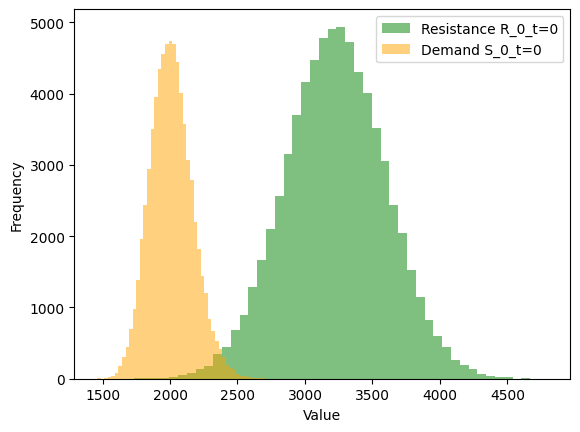

G_0 - p_f: 0.001671, β: 2.934314


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Plot histogram of G_0_t=0
plt.hist(results['G_0_t=0'], bins=50, alpha=0.7, color='blue')
plt.xlabel("Constraint Value (G_0_t=0)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 2. Find the three most probable points near zero for G_0_t=0
## 2.1 Sort the results by G_0_t=0 >=0
sorted_positive = results[results['G_0_t=0'] >= 0].sort_values(by='G_0_t=0', ascending=True)
print('Most Probable Points Near Failure (G_0_t=0 >= 0):')
print(sorted_positive.head(3))

## 2.2 Sort the results by G_0_t=0 <=0
sorted_negative = results[results['G_0_t=0'] <= 0].sort_values(by='G_0_t=0', ascending=False)
print('Most Probable Points Near Failure (G_0_t=0 <= 0):')
print(sorted_negative.head(3))


# 3. Overlay histograms for R_0_t=0 and S_0_t=0
plt.hist(results['R_0_t=0'], bins=50, alpha=0.5, color='green', label='Resistance R_0_t=0')
plt.hist(results['S_0_t=0'], bins=50, alpha=0.5, color='orange', label='Demand S_0_t=0')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# 4. Convert pf and beta to lists
pf_list = pf.iloc[:, :].values.flatten().tolist()
beta_list = beta.iloc[:, :].values.flatten().tolist()

# 5. Iterate through reliability results for constraints
for pf_column, beta_column, (pf_value, beta_value) in zip(pf.columns, beta.columns, zip(pf_list, beta_list)):
    print(f"{pf_column} - p_f: {pf_value:.6f}, β: {beta_value:.6f}")
